In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from io import StringIO
from scipy.stats import chi2_contingency

from IPython.display import display, HTML

# Crear una paleta de colores degradados
cmap = sns.light_palette("#800000", n_colors=len(df3['Frecuencia']))

In [267]:
# Cargar el archivo de Excel
file_path = 'diagnostico_pais.xlsx'
df = pd.read_excel(file_path)

In [268]:
# Mostrar las primeras filas del DataFrame para revisar la estructura
df.head()

,Edad,Género,Grado_académico,Profesión/Ocupación,Lugar de trabajo,Lugar_de_residencia,Experiencia_laboral,Programa_de_formación,Areas_de_interés,Ciencias_Salud,...,Ciencias_Jurídicas,Ingeniería_y_Arquitectura,Ciencias_y_Humanidades,Agronomía,Veterinaria,Ciencias_Naturales_y_Matemáticas,modalidad_preferida,"Si ha seleccionado una modalidad semipresencial o totalmente virtual, ¿cuál es la razón principal de esta preferencia?",Factores_Importantes,¿Hay algún otro aspecto relevante que considera importante al momento de elegir una maestría o diplomado?
0,36,Masculino,Maestría,Docente,UES/FMO,San_Miguel,10,Doctorado,Ciencias_Económicas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Estudios_semipresenciales/virtuales,Horarios,Calidad_del_programa,Experiencia de los docentes
1,36,Masculino,Maestría,Docente,Universidad de Oriente,San_Miguel,12,Maestría Doctorado,Tecnología Ciencias_y_Humanidades,NaN,...,NaN,NaN,Comunicación Educación,NaN,NaN,NaN,Estudios_semipresenciales/virtuales,Horarios de trabajo,Flexibilidad_de_horarios Costo_del_programa Ca...,Título certificado
2,30,Masculino,Maestría,Contador,Universidad de Oriente,La_Unión,6,Maestría Doctorado,Tecnología Ciencias_Económicas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Estudios_semipresenciales/virtuales,una modalidad 60% virtual 40% presencial puede...,Flexibilidad_de_horarios Calidad_del_programa ...,La especialidad del curso (valores agregados)
3,19,Femenino,Bachillerato,Estudiante,Ninguno,San_Miguel,0,Diplomado,Ciencias_de_la_Salud Ciencias_Naturales_y_Mate...,Nutrición,...,NaN,Mecánica Eléctrica Industrial,NaN,NaN,NaN,Matemáticas,Estudios_presenciales,NaN,Duración_del_programa Flexibilidad_de_horarios...,Ninguno
4,46,Femenino,Ingeniería,Docente,UNIVO,San_Miguel,17,Diplomado Maestría,Ciencias_y_Humanidades,NaN,...,NaN,NaN,Psicología Educación,NaN,NaN,NaN,Estudios_semipresenciales/virtuales,VALORO LA PRESENCIALIDAD PERO TENGO LIMITANTES...,Duración_del_programa Flexibilidad_de_horarios...,LA VOCACIÓN DEL DOCENTE


In [157]:
# 1. Edad Promedio
edad_promedio = df['Edad'].mean()
print(f"Edad Promedio: {edad_promedio}")

Edad Promedio: 29.845890410958905


In [229]:
experiencia_promedio = df['Experiencia_laboral'].mean()
print(f"Experiencia laboral Promedio: {experiencia_promedio}")

Experiencia laboral Promedio: 6.835616438356165


In [7]:
# 2. Distribución de Género
distribucion_genero = df['Género'].value_counts(normalize=True) * 100
print("Distribución de Género (Porcentaje):")
print(distribucion_genero)

Distribución de Género (Porcentaje):
Género
Masculino    50.342466
Femenino     49.486301
otro          0.171233
Name: proportion, dtype: float64


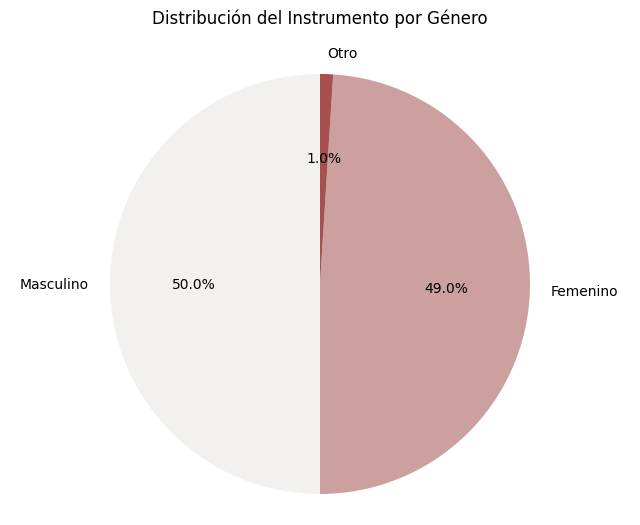

In [71]:
# Datos de distribución de género
genero = ['Masculino', 'Femenino', 'Otro']
porcentajes = [50, 49, 1.0]

# Crear gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(porcentajes, labels=genero, autopct='%1.1f%%', startangle=90, colors=cmap)
plt.title('Distribución del Instrumento por Género\n')
plt.axis('equal')  # Para asegurar que el pastel se dibuje como un círculo
plt.savefig('grafico1.png')
plt.show()

# Crear un botón de descarga para el gráfico
file_path = "grafico1.png"
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

In [9]:
# 3. Nivel Académico Predominante
nivel_academico_predominante = df['Grado_académico'].mode()[0]
print(f"Nivel Académico Predominante: {nivel_academico_predominante}")

Nivel Académico Predominante: Bachillerato


In [10]:
# 4. Distribución Profesional
# Quitar los espacios al principio y al final de las entradas en la columna 'Profesión/Ocupación'
df['Profesión/Ocupación'] = df['Profesión/Ocupación'].str.strip()

distribucion_profesional = df['Profesión/Ocupación'].value_counts(normalize=True) * 100
print("Distribución Profesional (Porcentaje):")
print(distribucion_profesional)

Distribución Profesional (Porcentaje):
Profesión/Ocupación
Docente                      31.849315
Estudiante                   23.801370
Ingeniero                    14.726027
Empleado                      5.308219
Arquitecto                    3.424658
Administrador                 3.253425
Contador                      2.226027
Laboratorista Clínico         1.541096
Médico Veterinario            1.369863
Médico                        1.198630
Abogado                       1.027397
Técnico                       1.027397
Psicologo                     0.856164
Investigador                  0.513699
Enfermero                     0.513699
Gerente                       0.342466
Psicóloga                     0.342466
Auditor                       0.342466
Comerciante                   0.342466
Cocinero                      0.342466
Electricista                  0.342466
Promotor                      0.342466
Economista                    0.342466
Mercadólogo                   0.342466
Enfer

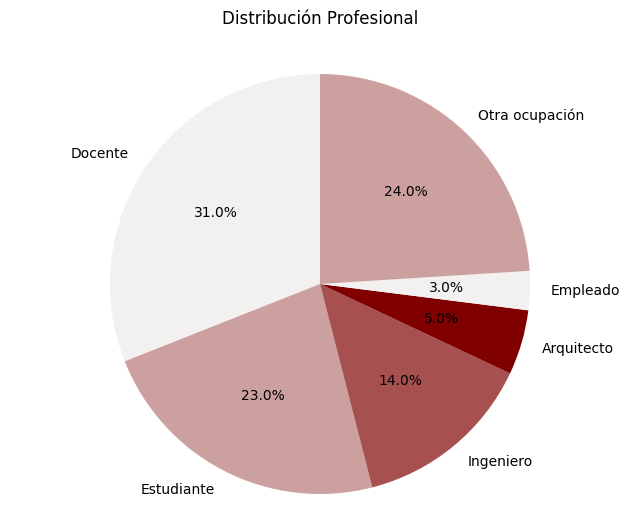

In [76]:
# Datos de distribución de género
ocupacion = ['Docente', 'Estudiante','Ingeniero','Arquitecto','Empleado','Otra ocupación']
porcentajes = [31, 23, 14,5,3,24]

# Crear gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(porcentajes, labels=ocupacion, autopct='%1.1f%%', startangle=90, colors=cmap)
plt.title('Distribución Profesional\n')
plt.axis('equal')  # Para asegurar que el pastel se dibuje como un círculo
plt.savefig('grafico2.png')
plt.show()

# Crear un botón de descarga para el gráfico
file_path = "grafico2.png"
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 5. Interés por Tipo de Formación

In [84]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Programa_de_formación'].dropna().astype(str).tolist())

Doctorado: 81
Maestría: 147
Diplomado: 140
Curso_corto: 105


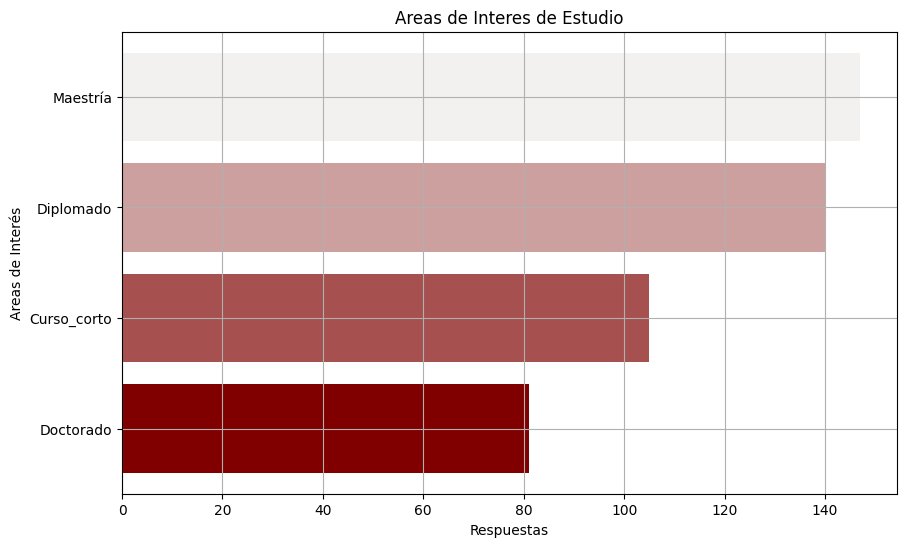

In [85]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color=cmap)#'#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.savefig('grafico3.png')
plt.grid()
plt.show()

# Crear un botón de descarga para el gráfico
file_path = "grafico3.png"
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

In [86]:
# Crear un DataFrame a partir del diccionario
df2 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df2 = df2.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df2)

       Palabra  Frecuencia
0     Maestría         147
1    Diplomado         140
2  Curso_corto         105
3    Doctorado          81


In [87]:
# Crear un DataFrame a partir del diccionario
df2 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df2['Porcentaje'] = (df2['Frecuencia'] / df2['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df2 = df2.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df2)

       Palabra  Frecuencia  Porcentaje
0     Maestría         147   31.078224
1    Diplomado         140   29.598309
2  Curso_corto         105   22.198732
3    Doctorado          81   17.124736


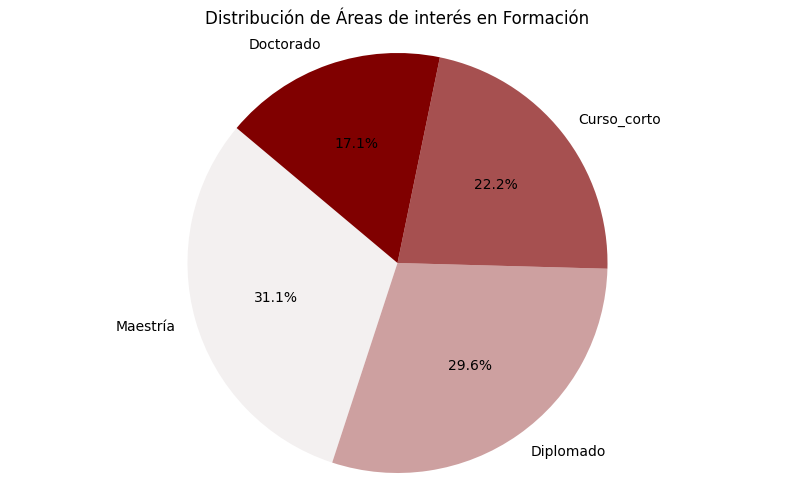

In [88]:
# Graficar en un pastel
plt.figure(figsize=(10, 6))
plt.pie(df2['Frecuencia'], labels=df2['Palabra'], autopct='%1.1f%%', startangle=140, colors=cmap)
plt.title('Distribución de Áreas de interés en Formación')
plt.axis('equal')  # Para asegurar que el pastel se dibuje como un círculo
plt.savefig('grafico3.png')
plt.grid()
plt.show()

# Crear un botón de descarga para el gráfico
file_path = "grafico3.png"
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 6. Preferencia por Área Temática

In [89]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Areas_de_interés'].dropna().astype(str).tolist())

Ciencias_Económicas: 193
Tecnología: 281
Ciencias_y_Humanidades: 154
Ciencias_de_la_Salud: 115
Ciencias_Naturales_y_Matemáticas: 156
Ingeniería_y_Arquitectura: 211
Agronomía: 58
Otros: 43
Veterinaria: 73
Ciencias_Jurídicas: 73


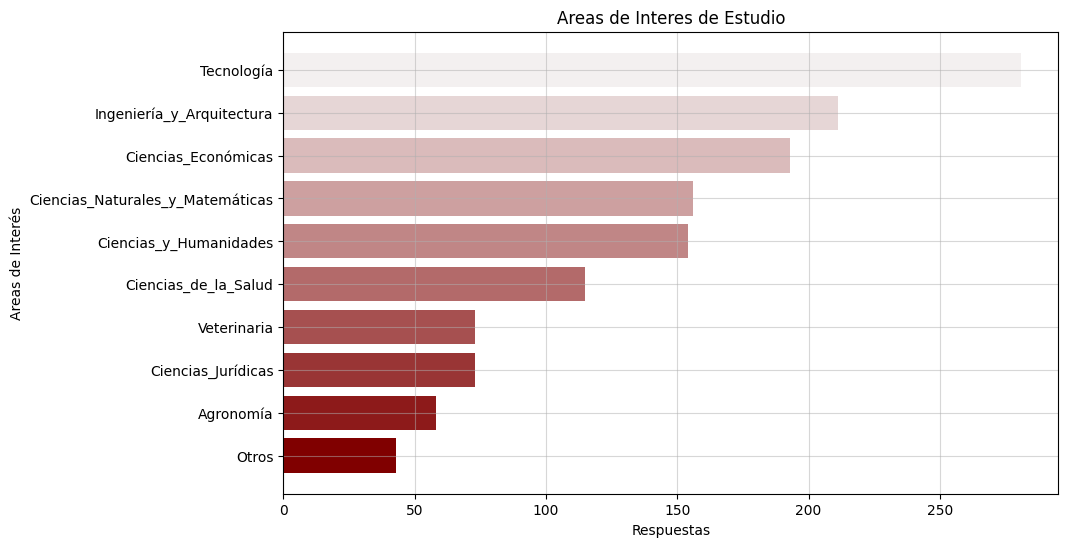

In [95]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color=cmap)
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.savefig('grafico4.png')
plt.grid(True, alpha=0.5)
plt.show()

# Crear un botón de descarga para el gráfico
file_path = "grafico4.png"
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

In [91]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                            Palabra  Frecuencia
0                        Tecnología         281
1         Ingeniería_y_Arquitectura         211
2               Ciencias_Económicas         193
3  Ciencias_Naturales_y_Matemáticas         156
4            Ciencias_y_Humanidades         154
5              Ciencias_de_la_Salud         115
6                       Veterinaria          73
7                Ciencias_Jurídicas          73
8                         Agronomía          58
9                             Otros          43


In [99]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(round(df3,1))

                            Palabra  Frecuencia  Porcentaje
0                        Tecnología         281        20.7
1         Ingeniería_y_Arquitectura         211        15.5
2               Ciencias_Económicas         193        14.2
3  Ciencias_Naturales_y_Matemáticas         156        11.5
4            Ciencias_y_Humanidades         154        11.3
5              Ciencias_de_la_Salud         115         8.5
6                       Veterinaria          73         5.4
7                Ciencias_Jurídicas          73         5.4
8                         Agronomía          58         4.3
9                             Otros          43         3.2


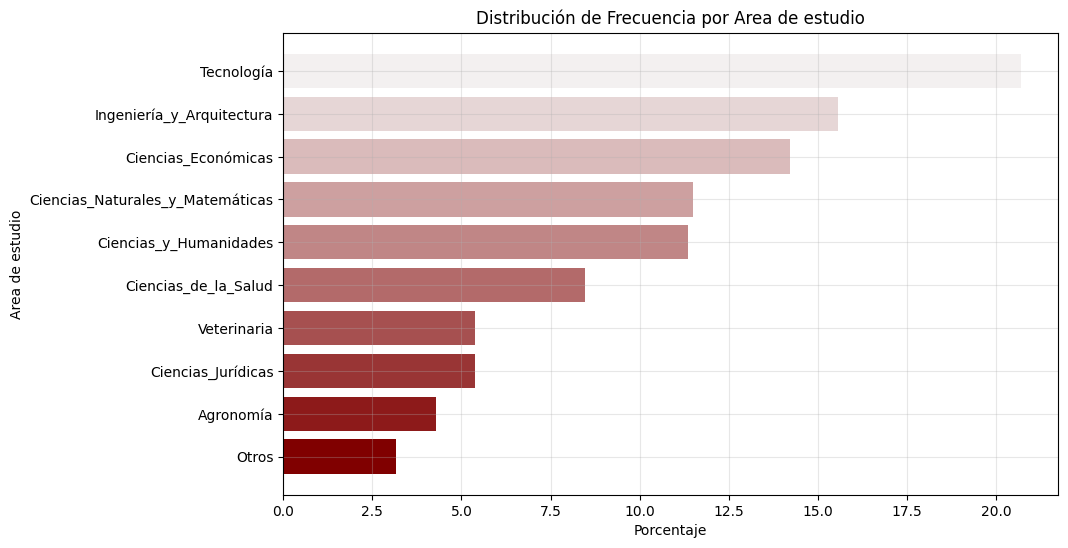

In [105]:
# Crear el gráfico de barras
# Supongamos que el DataFrame df3 ya ha sido creado y organizado como se describió anteriormente
# y ahora contiene las columnas 'Palabra', 'Frecuencia', y 'Porcentaje'.

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(df3['Palabra'], df3['Porcentaje'], color=cmap)
plt.xlabel('Porcentaje')
plt.ylabel('Area de estudio')
plt.title('Distribución de Frecuencia por Area de estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico4.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 7. Interés Específico en Salud

In [107]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Ciencias_Salud'].dropna().astype(str).tolist())

Nutrición: 29
Medicina: 45
Psicología: 38
Química_y_Farmacia: 17
Odontología: 19
Enfermería: 30
Otros: 4
Fisioterapia: 14


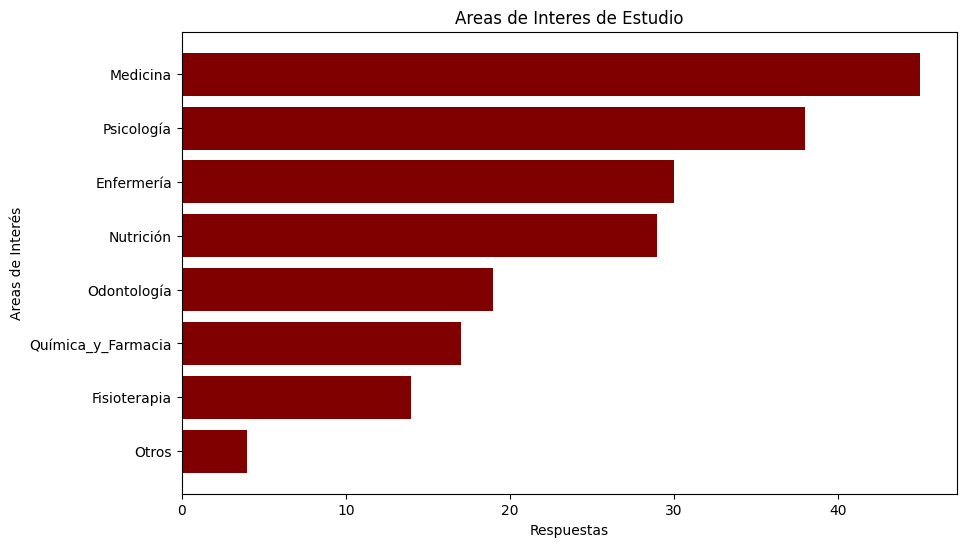

In [108]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [109]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

              Palabra  Frecuencia
0            Medicina          45
1          Psicología          38
2          Enfermería          30
3           Nutrición          29
4         Odontología          19
5  Química_y_Farmacia          17
6        Fisioterapia          14
7               Otros           4


In [110]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

              Palabra  Frecuencia  Porcentaje
0            Medicina          45   22.959184
1          Psicología          38   19.387755
2          Enfermería          30   15.306122
3           Nutrición          29   14.795918
4         Odontología          19    9.693878
5  Química_y_Farmacia          17    8.673469
6        Fisioterapia          14    7.142857
7               Otros           4    2.040816


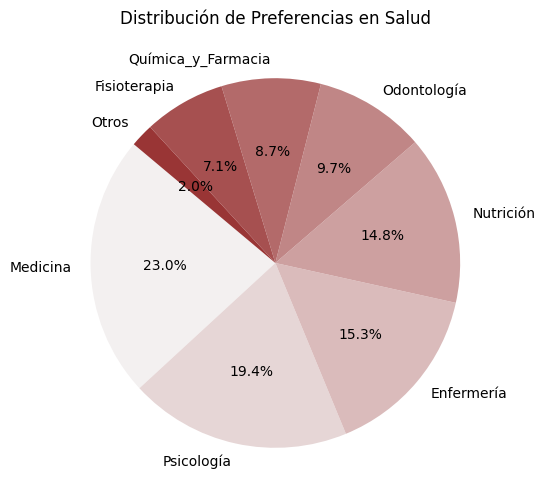

In [116]:
# Graficar en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.pie(df3['Frecuencia'], labels=df3['Palabra'], autopct='%1.1f%%', startangle=140, colors=cmap)
plt.title('Distribución de Preferencias en Salud')
plt.xticks(rotation=45)
#plt.legend()
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico5.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 8. Interés Específico en Tecnología

In [117]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Tecnología'].dropna().astype(str).tolist())

Inteligencia_Artificial: 163
Ciberseguridad: 95
Realidad_aumentada: 32
Inteligencia_de_Negocios: 138
Power_BI: 50
Big_data: 52
Automatización: 61
Diseño_industrial: 65
Blockchain: 21
Python: 48
Impresión_3D: 86
Otros: 9
Cloud_computing: 33
IoT: 17


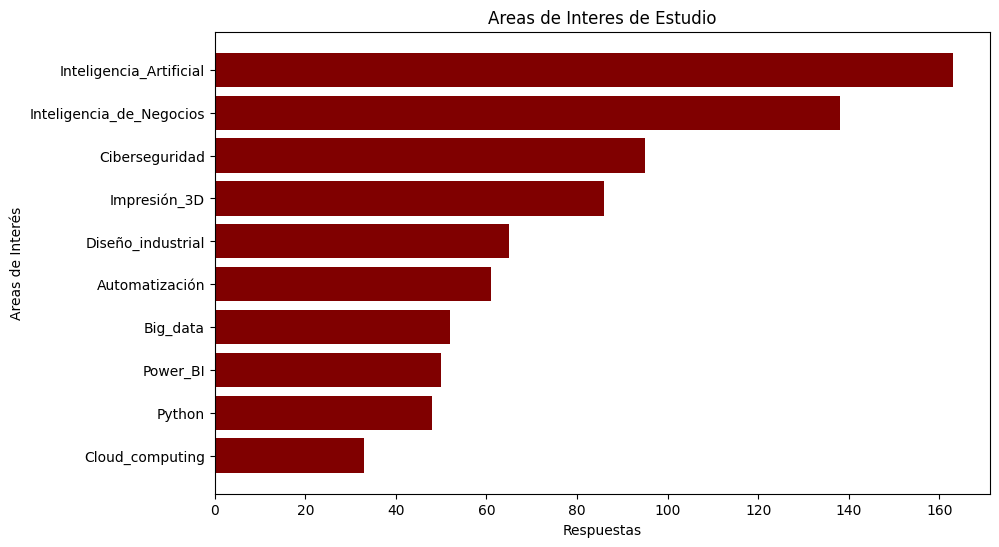

In [118]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [119]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                     Palabra  Frecuencia
0    Inteligencia_Artificial         163
1   Inteligencia_de_Negocios         138
2             Ciberseguridad          95
3               Impresión_3D          86
4          Diseño_industrial          65
5             Automatización          61
6                   Big_data          52
7                   Power_BI          50
8                     Python          48
9            Cloud_computing          33
10        Realidad_aumentada          32
11                Blockchain          21
12                       IoT          17
13                     Otros           9


In [120]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                     Palabra  Frecuencia  Porcentaje
0    Inteligencia_Artificial         163   18.735632
1   Inteligencia_de_Negocios         138   15.862069
2             Ciberseguridad          95   10.919540
3               Impresión_3D          86    9.885057
4          Diseño_industrial          65    7.471264
5             Automatización          61    7.011494
6                   Big_data          52    5.977011
7                   Power_BI          50    5.747126
8                     Python          48    5.517241
9            Cloud_computing          33    3.793103
10        Realidad_aumentada          32    3.678161
11                Blockchain          21    2.413793
12                       IoT          17    1.954023
13                     Otros           9    1.034483


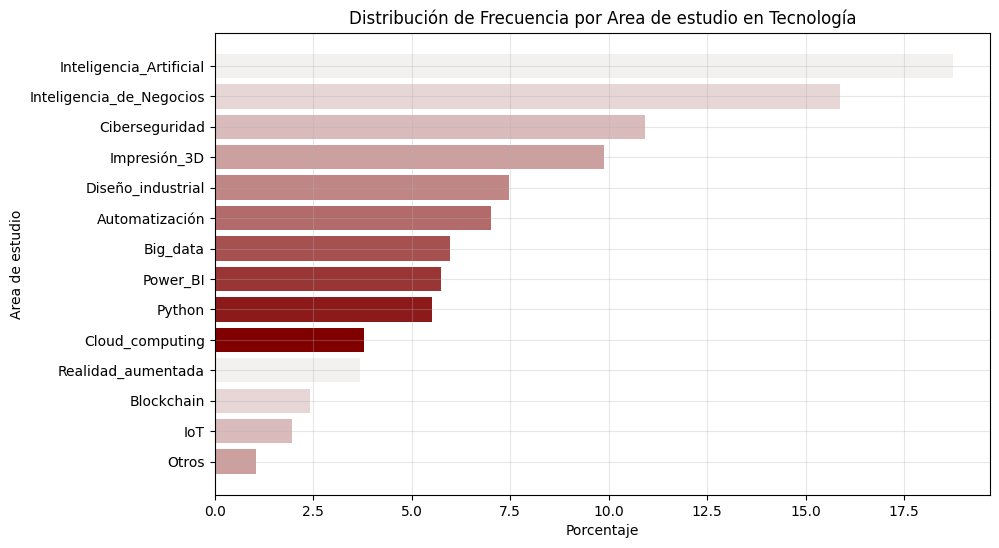

In [123]:
# Crear el gráfico de barras
# Supongamos que el DataFrame df3 ya ha sido creado y organizado como se describió anteriormente
# y ahora contiene las columnas 'Palabra', 'Frecuencia', y 'Porcentaje'.

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(df3['Palabra'], df3['Porcentaje'], color=cmap)
plt.xlabel('Porcentaje')
plt.ylabel('Area de estudio')
plt.title('Distribución de Frecuencia por Area de estudio en Tecnología')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico4.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 9. Interés Específico en Economía

In [124]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Ciencias_Económicas'].dropna().astype(str).tolist())

Otros: 1
Economía: 61
Comercio_Internacional: 54
Negocios_Internacionales: 60
Dirección_Financiera: 41
Administración: 94
Contaduría: 46
Finanzas: 81
Mercadotecnia: 47
Gastronomía: 18
Emprendimiento: 54
Logística_y_Cadenas_de_Suministro: 37
Management: 32
Turismo: 29
Auditoría: 31
Recursos_Humanos: 32


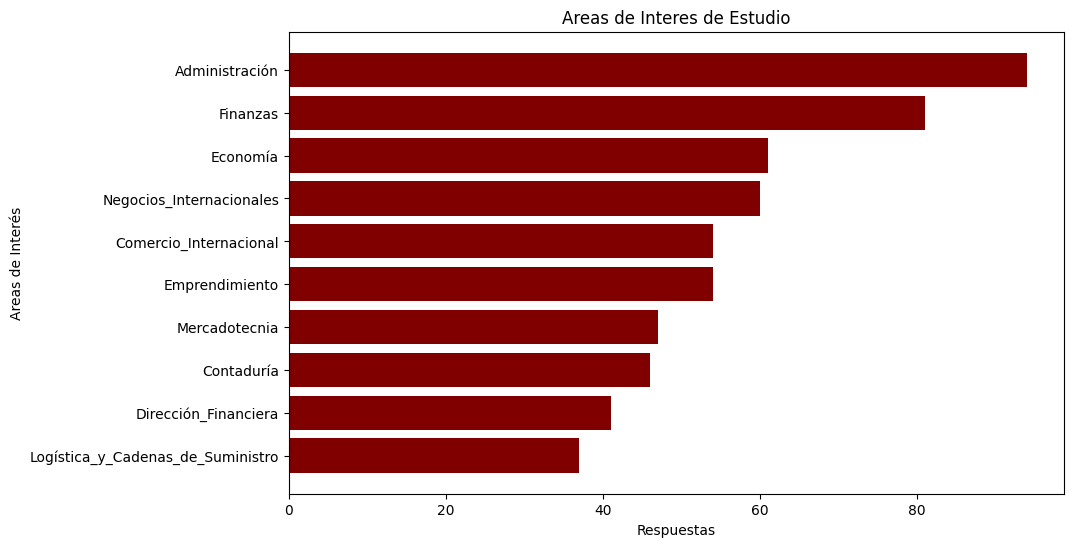

In [125]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [126]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                              Palabra  Frecuencia
0                      Administración          94
1                            Finanzas          81
2                            Economía          61
3            Negocios_Internacionales          60
4              Comercio_Internacional          54
5                      Emprendimiento          54
6                       Mercadotecnia          47
7                          Contaduría          46
8                Dirección_Financiera          41
9   Logística_y_Cadenas_de_Suministro          37
10                         Management          32
11                   Recursos_Humanos          32
12                          Auditoría          31
13                            Turismo          29
14                        Gastronomía          18
15                              Otros           1


In [127]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                              Palabra  Frecuencia  Porcentaje
0                      Administración          94   13.091922
1                            Finanzas          81   11.281337
2                            Economía          61    8.495822
3            Negocios_Internacionales          60    8.356546
4              Comercio_Internacional          54    7.520891
5                      Emprendimiento          54    7.520891
6                       Mercadotecnia          47    6.545961
7                          Contaduría          46    6.406685
8                Dirección_Financiera          41    5.710306
9   Logística_y_Cadenas_de_Suministro          37    5.153203
10                         Management          32    4.456825
11                   Recursos_Humanos          32    4.456825
12                          Auditoría          31    4.317549
13                            Turismo          29    4.038997
14                        Gastronomía          18    2.506964
15      

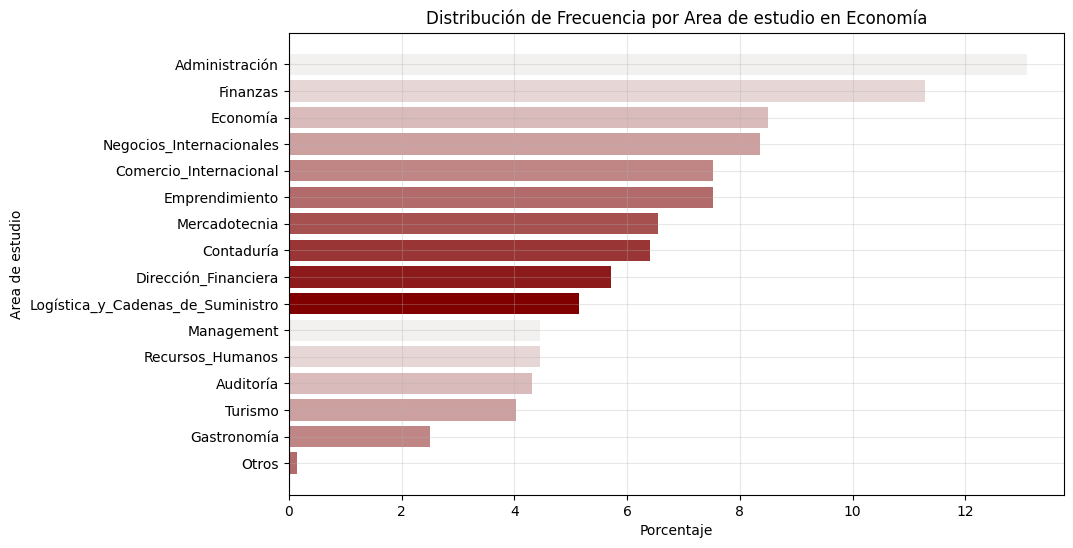

In [130]:
# Crear el gráfico de barras
# Supongamos que el DataFrame df3 ya ha sido creado y organizado como se describió anteriormente
# y ahora contiene las columnas 'Palabra', 'Frecuencia', y 'Porcentaje'.

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(df3['Palabra'], df3['Porcentaje'], color=cmap)
plt.xlabel('Porcentaje')
plt.ylabel('Area de estudio')
plt.title('Distribución de Frecuencia por Area de estudio en Economía')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico4.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 10. Interés Específico en Jurídicas

In [131]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Ciencias_Jurídicas'].dropna().astype(str).tolist())

Derecho: 42
Criminología: 29
Relaciones_laborales: 24
Derecho_internacional: 26


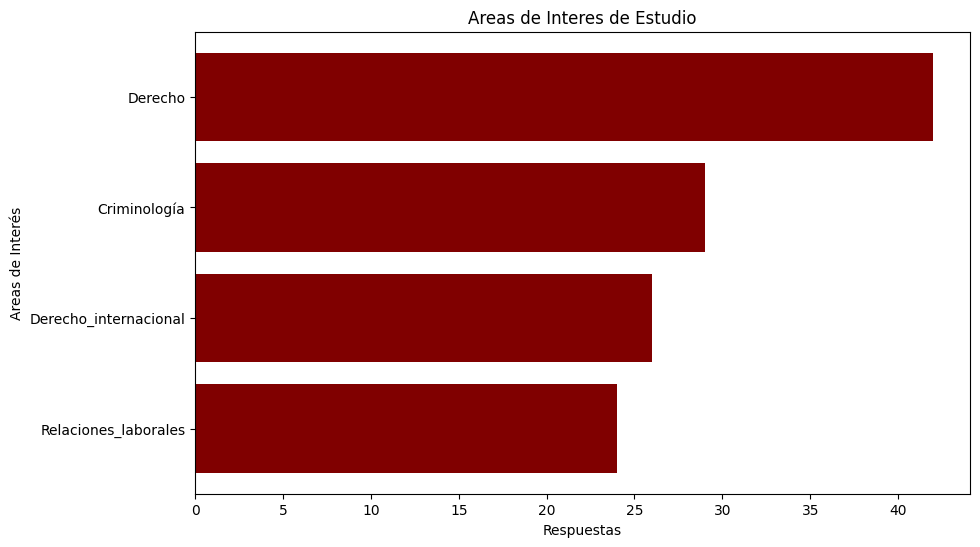

In [132]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [133]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                 Palabra  Frecuencia
0                Derecho          42
1           Criminología          29
2  Derecho_internacional          26
3   Relaciones_laborales          24


In [134]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                 Palabra  Frecuencia  Porcentaje
0                Derecho          42   34.710744
1           Criminología          29   23.966942
2  Derecho_internacional          26   21.487603
3   Relaciones_laborales          24   19.834711


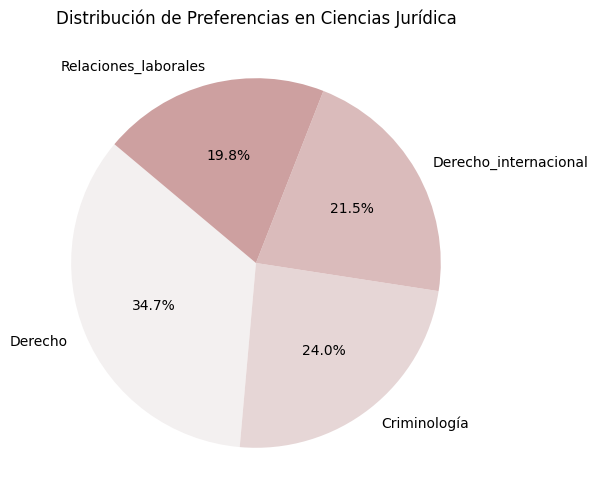

In [138]:
# Graficar en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.pie(df3['Frecuencia'], labels=df3['Palabra'], autopct='%1.1f%%', startangle=140, colors=cmap)
plt.title('Distribución de Preferencias en Ciencias Jurídica')
plt.xticks(rotation=45)
#plt.legend()
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico6.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 11 Interés Específico en Ingeniería y Arquitectura

In [179]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Ingeniería_y_Arquitectura'].dropna().astype(str).tolist())

Mecánica: 29
Eléctrica: 42
Industrial: 60
Ambiental: 47
Diseño_de_Interiores: 85
Formulación_y_Evaluación_de_Proyectos_(Metodología_BIM): 56
Otros: 8
Biomédica: 15
Urbanismo: 46
Civil: 70
Control_de_Calidad: 70
Electrónica: 34
Infraestructura_vial: 25
Topografía: 42


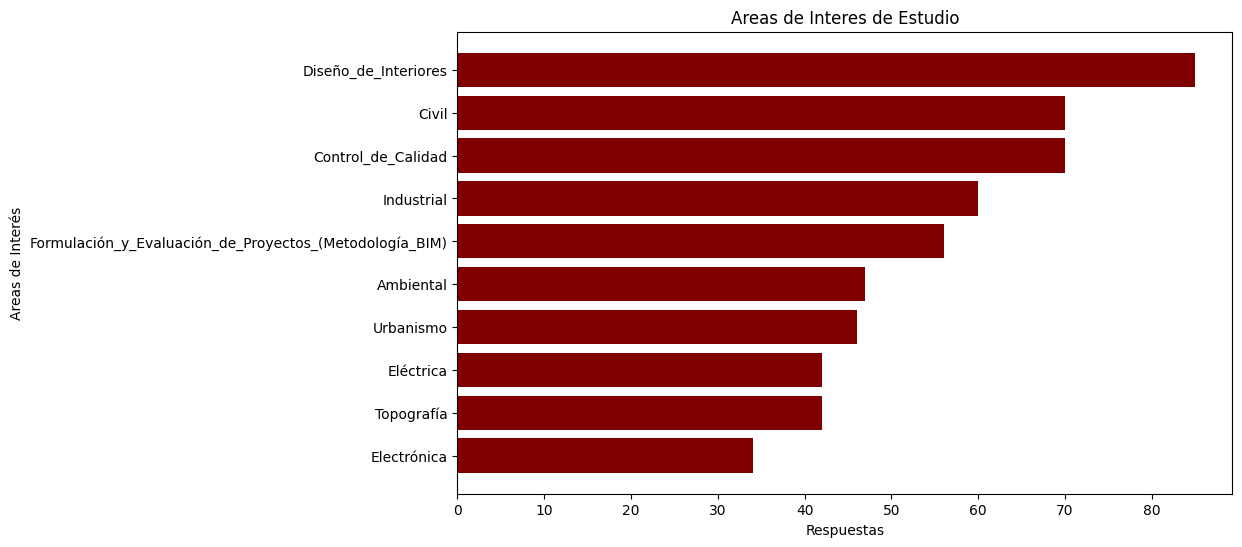

In [180]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [181]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                                              Palabra  Frecuencia
0                                Diseño_de_Interiores          85
1                                               Civil          70
2                                  Control_de_Calidad          70
3                                          Industrial          60
4   Formulación_y_Evaluación_de_Proyectos_(Metodol...          56
5                                           Ambiental          47
6                                           Urbanismo          46
7                                           Eléctrica          42
8                                          Topografía          42
9                                         Electrónica          34
10                                           Mecánica          29
11                               Infraestructura_vial          25
12                                          Biomédica          15
13                                              Otros           8


In [182]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                                              Palabra  Frecuencia  Porcentaje
0                                Diseño_de_Interiores          85   13.513514
1                                               Civil          70   11.128776
2                                  Control_de_Calidad          70   11.128776
3                                          Industrial          60    9.538951
4   Formulación_y_Evaluación_de_Proyectos_(Metodol...          56    8.903021
5                                           Ambiental          47    7.472178
6                                           Urbanismo          46    7.313196
7                                           Eléctrica          42    6.677266
8                                          Topografía          42    6.677266
9                                         Electrónica          34    5.405405
10                                           Mecánica          29    4.610493
11                               Infraestructura_vial          2

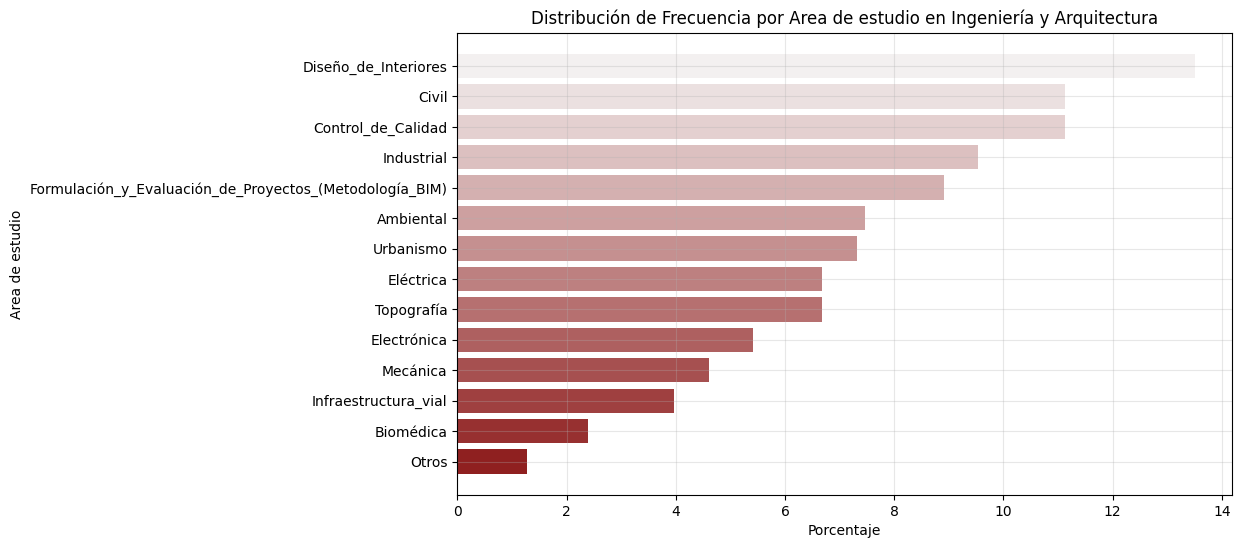

In [183]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(df3['Palabra'], df3['Porcentaje'], color=cmap)
plt.xlabel('Porcentaje')
plt.ylabel('Area de estudio')
plt.title('Distribución de Frecuencia por Area de estudio en Ingeniería y Arquitectura')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico4.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 12 Interés Específico en Ciencias y Humanidades

In [172]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Ciencias_y_Humanidades'].dropna().astype(str).tolist())

Comunicación: 40
Educación: 98
Psicología: 72
Historia: 31
Sociología: 30
Antropología: 14
Form_y_Eval_de_Proy: 45
Métodos_Técnicas_Inv: 45
Filosofía: 28
Otros: 3


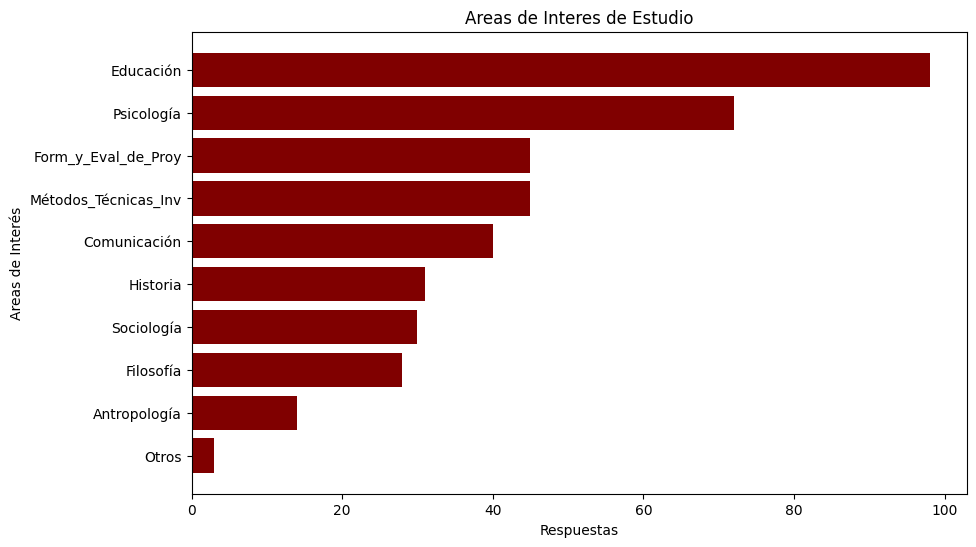

In [173]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [174]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                Palabra  Frecuencia
0             Educación          98
1            Psicología          72
2   Form_y_Eval_de_Proy          45
3  Métodos_Técnicas_Inv          45
4          Comunicación          40
5              Historia          31
6            Sociología          30
7             Filosofía          28
8          Antropología          14
9                 Otros           3


In [175]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                Palabra  Frecuencia  Porcentaje
0             Educación          98   24.137931
1            Psicología          72   17.733990
2   Form_y_Eval_de_Proy          45   11.083744
3  Métodos_Técnicas_Inv          45   11.083744
4          Comunicación          40    9.852217
5              Historia          31    7.635468
6            Sociología          30    7.389163
7             Filosofía          28    6.896552
8          Antropología          14    3.448276
9                 Otros           3    0.738916


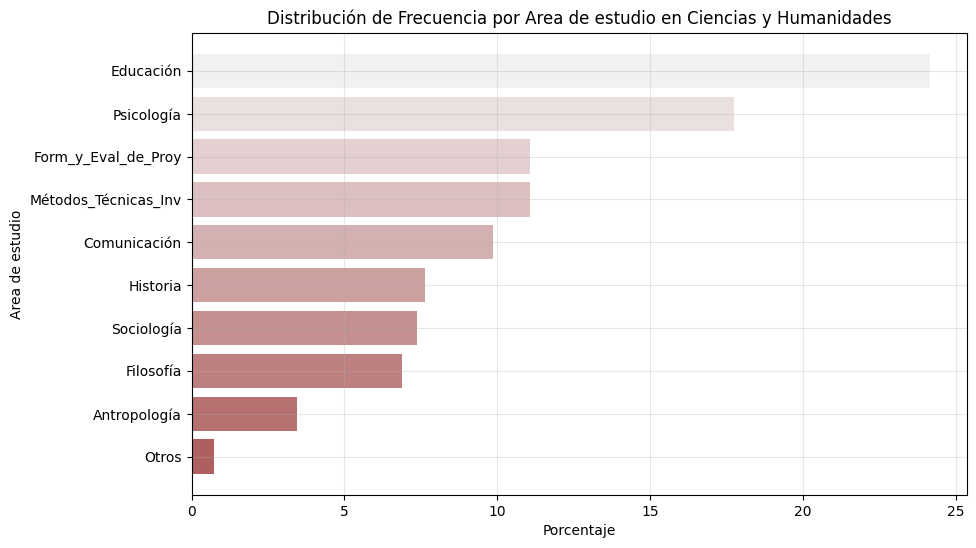

In [177]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(df3['Palabra'], df3['Porcentaje'], color=cmap)
plt.xlabel('Porcentaje')
plt.ylabel('Area de estudio')
plt.title('Distribución de Frecuencia por Area de estudio en Ciencias y Humanidades')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico4.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 13 Interés Específico en Agronomía

In [184]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Agronomía'].dropna().astype(str).tolist())

Agroecología: 13
Fruticultura: 24
Horticultura: 17
Cacaocultura: 12
Cafecultura: 18
Manejo_de_suelos: 16
Sanidad_vegetal: 15
Fertilización: 19
Ganadería_lechera: 28
Apicultura: 18
Ganadería_de_carne: 19
Acuicultura: 10
Riego_y_drenaje: 12
Otros: 2


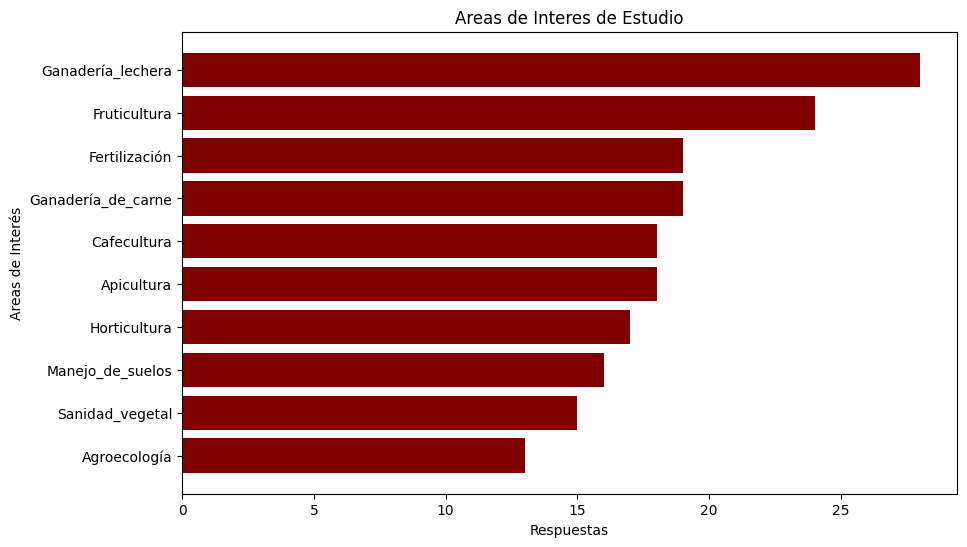

In [185]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [186]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

               Palabra  Frecuencia
0    Ganadería_lechera          28
1         Fruticultura          24
2        Fertilización          19
3   Ganadería_de_carne          19
4          Cafecultura          18
5           Apicultura          18
6         Horticultura          17
7     Manejo_de_suelos          16
8      Sanidad_vegetal          15
9         Agroecología          13
10        Cacaocultura          12
11     Riego_y_drenaje          12
12         Acuicultura          10
13               Otros           2


In [187]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

               Palabra  Frecuencia  Porcentaje
0    Ganadería_lechera          28   12.556054
1         Fruticultura          24   10.762332
2        Fertilización          19    8.520179
3   Ganadería_de_carne          19    8.520179
4          Cafecultura          18    8.071749
5           Apicultura          18    8.071749
6         Horticultura          17    7.623318
7     Manejo_de_suelos          16    7.174888
8      Sanidad_vegetal          15    6.726457
9         Agroecología          13    5.829596
10        Cacaocultura          12    5.381166
11     Riego_y_drenaje          12    5.381166
12         Acuicultura          10    4.484305
13               Otros           2    0.896861


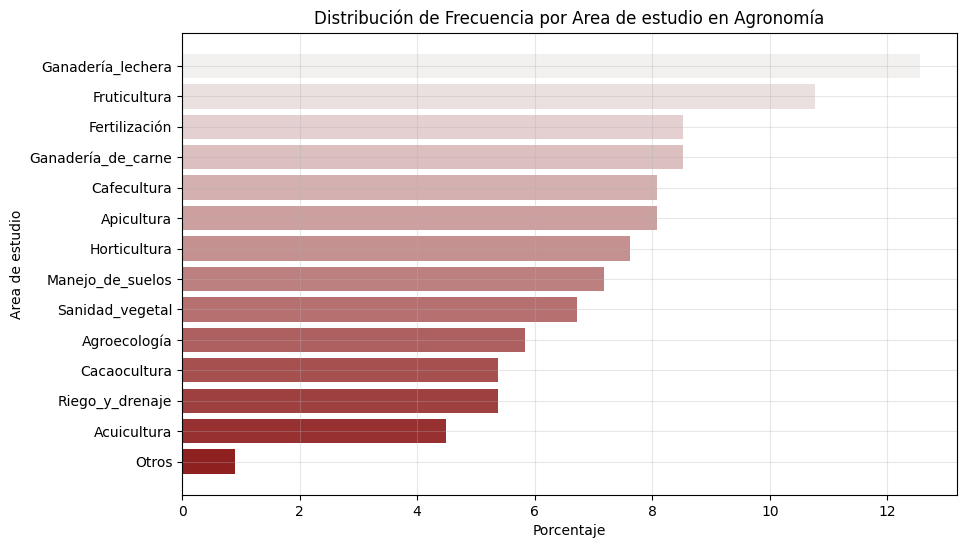

In [191]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(df3['Palabra'], df3['Porcentaje'], color=cmap)
plt.xlabel('Porcentaje')
plt.ylabel('Area de estudio')
plt.title('Distribución de Frecuencia por Area de estudio en Agronomía')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico7.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 14 Interés Específico en Veterinaria

In [201]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Veterinaria'].dropna().astype(str).tolist())

Reproducción_animal: 18
Zootecnia: 23
Cirugía_veterinaria: 30
Farmacia_veterinaria: 18
Pecuaria: 10
Medicina_interna_de_animales: 22
Parasitología_veterinaria: 13
Salud_pública_veterinaria: 46
Patología_veterinaria: 17
Farmacología_veterinaria: 16
Epidemiología_veterinaria: 7
Producción_animal: 23
Imagenología_veterinaria: 8
Biotecnología_veterinaria: 7
Otros: 3


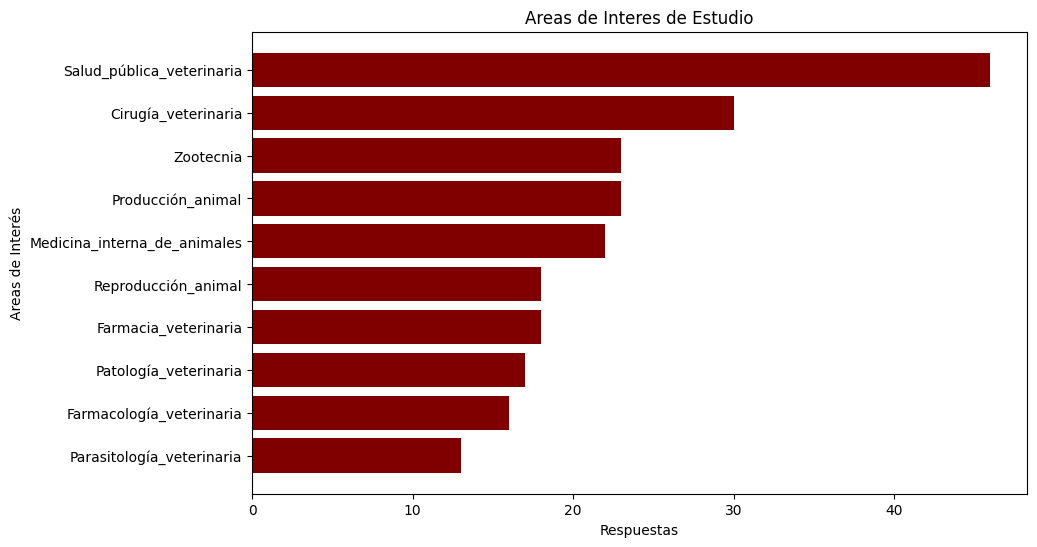

In [202]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [203]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                         Palabra  Frecuencia
0      Salud_pública_veterinaria          46
1            Cirugía_veterinaria          30
2                      Zootecnia          23
3              Producción_animal          23
4   Medicina_interna_de_animales          22
5            Reproducción_animal          18
6           Farmacia_veterinaria          18
7          Patología_veterinaria          17
8       Farmacología_veterinaria          16
9      Parasitología_veterinaria          13
10                      Pecuaria          10
11      Imagenología_veterinaria           8
12     Epidemiología_veterinaria           7
13     Biotecnología_veterinaria           7
14                         Otros           3


In [204]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

                         Palabra  Frecuencia  Porcentaje
0      Salud_pública_veterinaria          46   17.624521
1            Cirugía_veterinaria          30   11.494253
2                      Zootecnia          23    8.812261
3              Producción_animal          23    8.812261
4   Medicina_interna_de_animales          22    8.429119
5            Reproducción_animal          18    6.896552
6           Farmacia_veterinaria          18    6.896552
7          Patología_veterinaria          17    6.513410
8       Farmacología_veterinaria          16    6.130268
9      Parasitología_veterinaria          13    4.980843
10                      Pecuaria          10    3.831418
11      Imagenología_veterinaria           8    3.065134
12     Epidemiología_veterinaria           7    2.681992
13     Biotecnología_veterinaria           7    2.681992
14                         Otros           3    1.149425


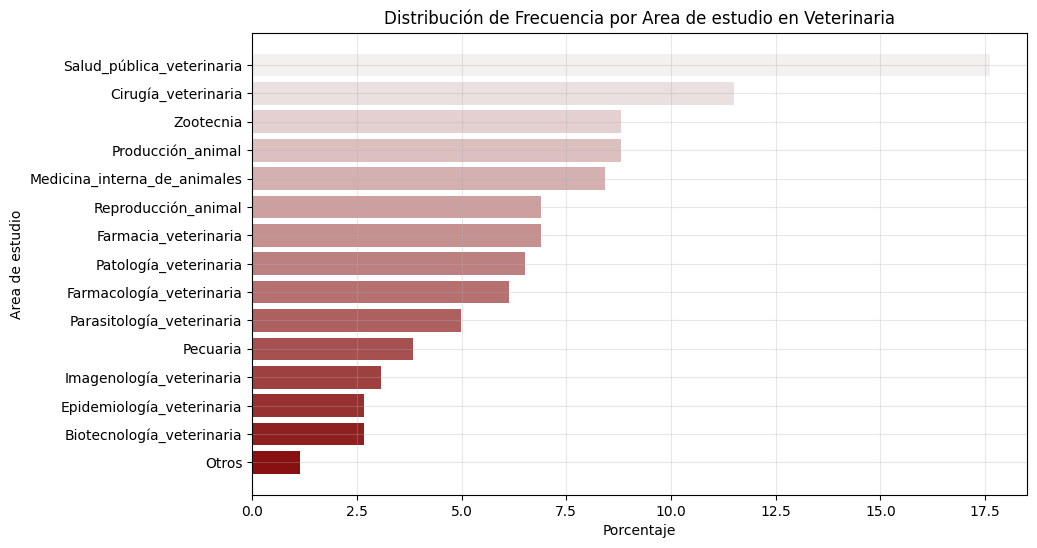

In [205]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(df3['Palabra'], df3['Porcentaje'], color=cmap)
plt.xlabel('Porcentaje')
plt.ylabel('Area de estudio')
plt.title('Distribución de Frecuencia por Area de estudio en Veterinaria')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico7.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# 15 Interés Específico en Ciencias Naturales y Matemáticas

In [207]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Ciencias_Naturales_y_Matemáticas'].dropna().astype(str).tolist())

Matemáticas: 113
Estadística: 64
Geología: 37
Biología: 62
Química: 50
Física: 75
Otros: 1


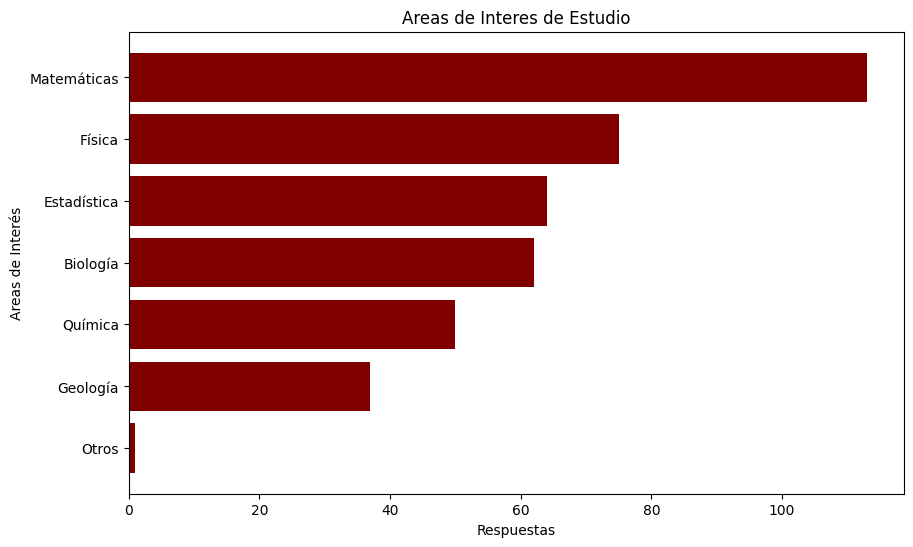

In [208]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Respuestas')
plt.ylabel('Areas de Interés')
plt.title('Areas de Interes de Estudio')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [209]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

       Palabra  Frecuencia
0  Matemáticas         113
1       Física          75
2  Estadística          64
3     Biología          62
4      Química          50
5     Geología          37
6        Otros           1


In [210]:
# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
# Calcular el porcentaje
df3['Porcentaje'] = (df3['Frecuencia'] / df3['Frecuencia'].sum()) * 100

# Ordenar el DataFrame por frecuencia descendente
df3 = df3.sort_values(by='Frecuencia', ascending=False)

# Mostrar el DataFrame
print(df3)

       Palabra  Frecuencia  Porcentaje
0  Matemáticas         113   28.109453
1       Física          75   18.656716
2  Estadística          64   15.920398
3     Biología          62   15.422886
4      Química          50   12.437811
5     Geología          37    9.203980
6        Otros           1    0.248756


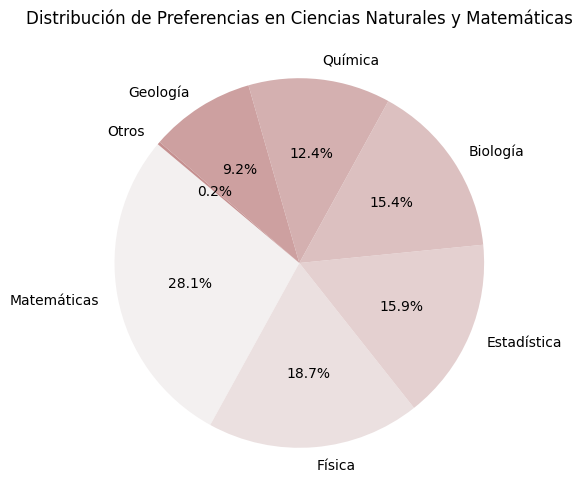

In [213]:
# Graficar en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.pie(df3['Frecuencia'], labels=df3['Palabra'], autopct='%1.1f%%', startangle=140, colors=cmap)
plt.title('Distribución de Preferencias en Ciencias Naturales y Matemáticas')
plt.xticks(rotation=45)
#plt.legend()
plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafico6.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

# Modalidad de estudio preferida

/var/folders/nq/l0_9gxxj3hv1_wwwd11kyscc0000gn/T/ipykernel_50248/743985270.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='modalidad_preferida', y='Edad', data=df, palette=cmap)
/var/folders/nq/l0_9gxxj3hv1_wwwd11kyscc0000gn/T/ipykernel_50248/743985270.py:7: UserWarning: The palette list has more values (16) than needed (4), which may not be intended.
  sns.boxplot(x='modalidad_preferida', y='Edad', data=df, palette=cmap)


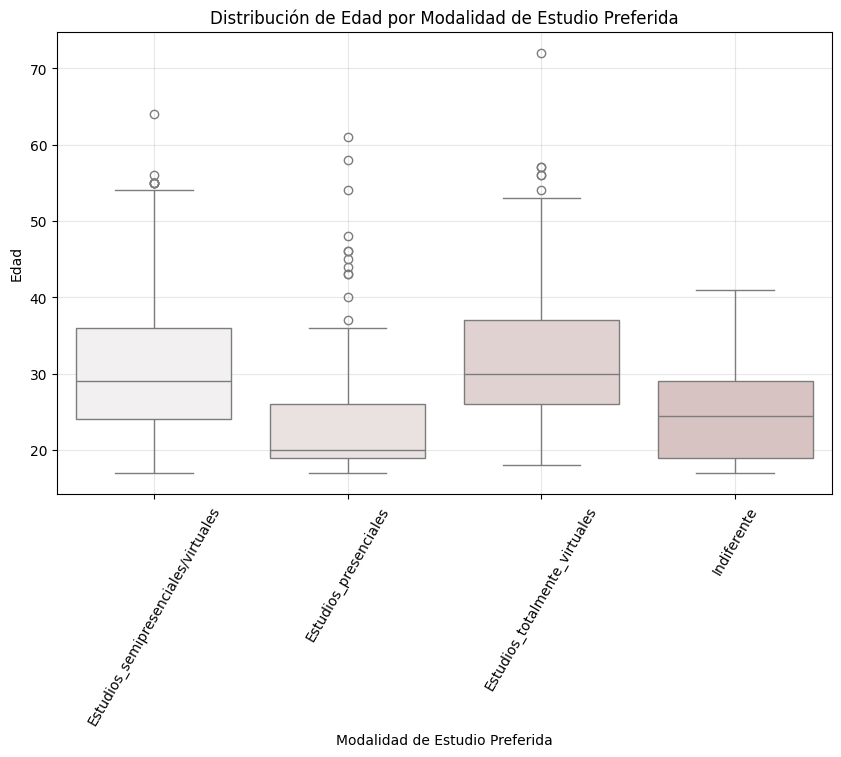

In [216]:

plt.figure(figsize=(10, 6))
palette = sns.color_palette("coolwarm", as_cmap=False)

sns.boxplot(x='modalidad_preferida', y='Edad', data=df, palette=cmap)

plt.title('Distribución de Edad por Modalidad de Estudio Preferida')
plt.xlabel('Modalidad de Estudio Preferida')
plt.ylabel('Edad')

# Rotar las etiquetas del eje x a 60 grados
plt.xticks(rotation=60)

plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'grafic9.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

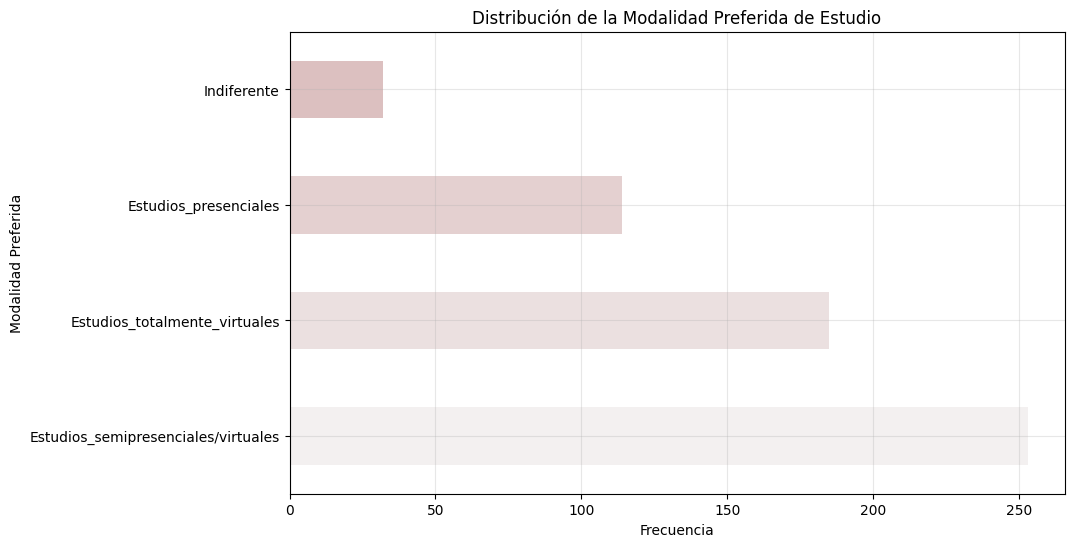

In [222]:
# Conteo de frecuencias de las modalidades preferidas
modalidad_counts = df['modalidad_preferida'].value_counts()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
modalidad_counts.plot(kind='barh', color=cmap)
plt.xlabel('Frecuencia')
plt.ylabel('Modalidad Preferida')
plt.title('Distribución de la Modalidad Preferida de Estudio')

plt.grid(True, alpha=0.3)  # Configurar la cuadrícula con 50% de transparencia
# Guardar el gráfico antes de mostrarlo
file_path = 'graf9.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

In [225]:
modalidad_counts = df['modalidad_preferida'].value_counts()
modalidad_counts

modalidad_preferida
Estudios_semipresenciales/virtuales    253
Estudios_totalmente_virtuales          185
Estudios_presenciales                  114
Indiferente                             32
Name: count, dtype: int64

In [228]:
modalidad_percentages = (modalidad_counts / modalidad_counts.sum()) * 100
modalidad_percentages

modalidad_preferida
Estudios_semipresenciales/virtuales    43.321918
Estudios_totalmente_virtuales          31.678082
Estudios_presenciales                  19.520548
Indiferente                             5.479452
Name: count, dtype: float64

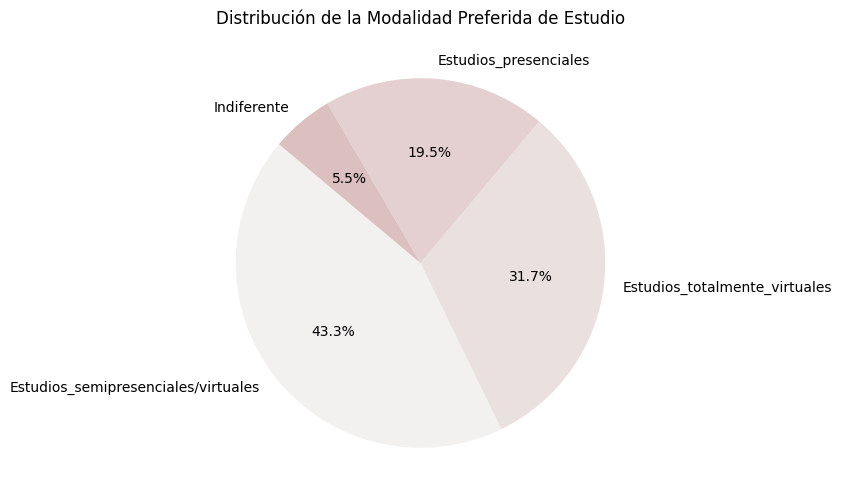

In [224]:

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
modalidad_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors =cmap)
plt.title('Distribución de la Modalidad Preferida de Estudio')
plt.ylabel('')  # Quitar la etiqueta del eje y

# Guardar el gráfico antes de mostrarlo
file_path = 'modalidad_preferida.png'
plt.savefig(file_path)

# Mostrar el gráfico
plt.show()

# Mostrar un botón de descarga para el gráfico
display(HTML(f'<a href="{file_path}" target="_blank" download>Descargar gráfico</a>'))

In [217]:
grouped = df.groupby('modalidad_preferida')['Edad'].describe()
print(grouped)
output_path = "Estadisticas_Descriptivas_Edad_Modalidad.csv"
grouped.to_csv(output_path)

                                     count       mean       std   min   25%  \
modalidad_preferida                                                           
Estudios_presenciales                114.0  24.631579  9.259545  17.0  19.0   
Estudios_semipresenciales/virtuales  253.0  30.952569  9.816457  17.0  24.0   
Estudios_totalmente_virtuales        185.0  32.313514  9.317415  18.0  26.0   
Indiferente                           32.0  25.406250  7.352241  17.0  19.0   

                                      50%   75%   max  
modalidad_preferida                                    
Estudios_presenciales                20.0  26.0  61.0  
Estudios_semipresenciales/virtuales  29.0  36.0  64.0  
Estudios_totalmente_virtuales        30.0  37.0  72.0  
Indiferente                          24.5  29.0  41.0  


# Area de Interes vs Género

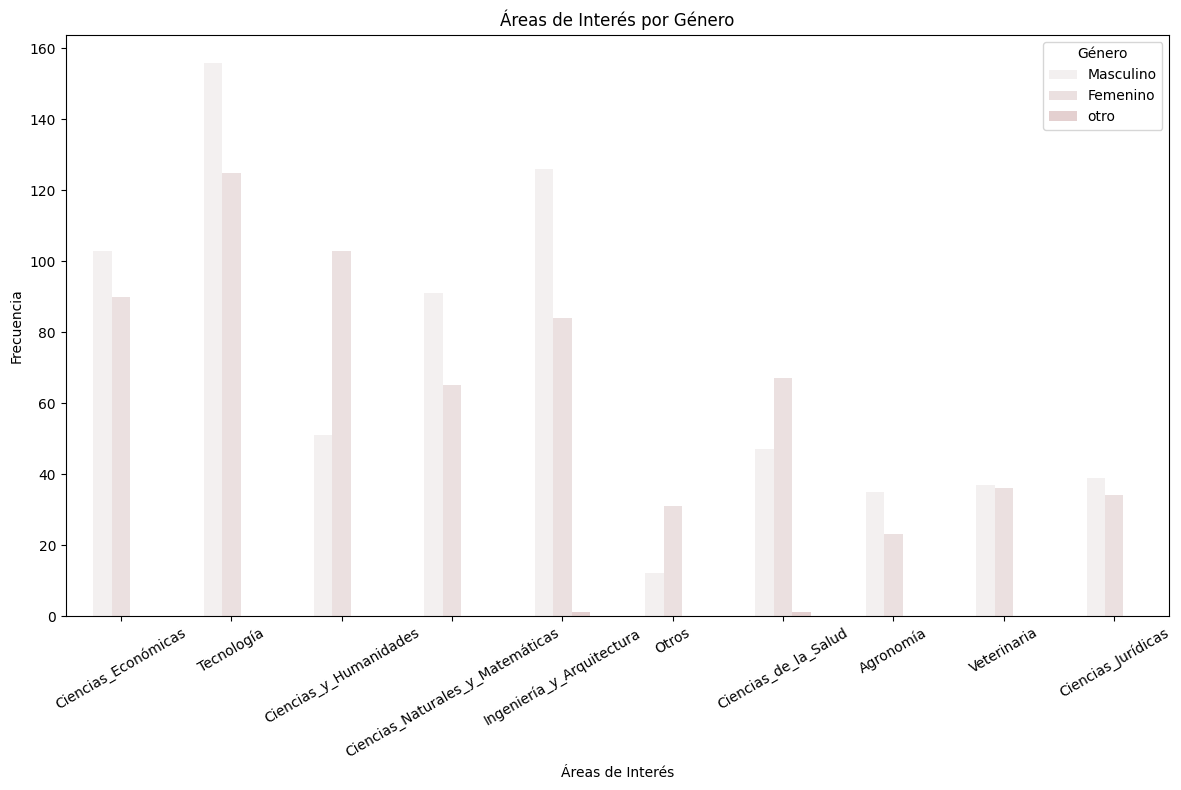

In [233]:
# Concatenar las dos columnas en una sola columna de texto por fila
df['combined'] = df['Género'].astype(str) + '\t' + df['Areas_de_interés'].astype(str)

# Concatenar todos los valores de la columna combinada en un solo párrafo, excluyendo valores NaN
data = '\n'.join(df['combined'].dropna().tolist())

# Preparación de los datos
tuplas_datos = []
for line in data.strip().split("\n"):
    if '\t' in line:
        genero, intereses = line.split("\t")
        tuplas_datos.append((genero, intereses.split()))

# Conteo de intereses por género
interest_count = {}
for gender, interests in tuplas_datos:
    if gender not in interest_count:
        interest_count[gender] = {}
    for interest in interests:
        if interest not in interest_count[gender]:
            interest_count[gender][interest] = 0
        interest_count[gender][interest] += 1

# Convertir el diccionario en DataFrame para visualización
df1 = pd.DataFrame.from_dict(interest_count, orient='index').fillna(0)
df1 = df1.transpose()

fig, ax = plt.subplots(figsize=(12, 8))
df1.plot(kind='bar', ax=ax, color= cmap)
ax.set_title('Áreas de Interés por Género')
ax.set_xlabel('Áreas de Interés')
ax.set_ylabel('Frecuencia')
plt.xticks(rotation=30)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

# Grado Academico vs Factores Importantes "ARREGLAR LA GRAFICA" 

In [ ]:
# Concatenar las dos columnas en una sola columna de texto por fila
df['combined'] = df['Grado_académico'].astype(str) + '\t' + df['Factores_Importantes'].astype(str)

# Concatenar todos los valores de la columna combinada en un solo párrafo, excluyendo valores NaN
data2 = '\n'.join(df['combined'].dropna().tolist())


In [ ]:

# Preparación de los datos
tuplas_datos = []
for line in data2.strip().split("\n")[1:]:
    grado_academico, factores_importantes = line.split("\t")
    tuplas_datos.append((grado_academico, factores_importantes.split()))

# Conteo de factores importantes por grado académico
factores_importantes_count = {}
for grado_academico, factores_importantes in tuplas_datos:
    if grado_academico not in factores_importantes_count:
        factores_importantes_count[grado_academico] = {}
    for factores in factores_importantes:
        if factores not in factores_importantes_count[grado_academico]:
            factores_importantes_count[grado_academico][factores] = 0
        factores_importantes_count[grado_academico][factores] += 1

# Convertir el diccionario en DataFrame para visualización
df2 = pd.DataFrame.from_dict(factores_importantes_count, orient='index').fillna(0)
df2 = df2.transpose()

fig, ax = plt.subplots(figsize=(12, 8))
df2.plot(kind='bar', ax=ax)
ax.set_title('Factores Importantes para elegir por la formacion según su Grado Académico')
ax.set_xlabel('Factores Importantes')
ax.set_ylabel('Frecuencia')
plt.xticks(rotation=30)
plt.legend(title='Grado Académico')
plt.tight_layout()
plt.show()


# Años de Experiencia vs Areas de Interes

Objetivo: Evaluar si la experiencia laboral afecta las áreas de interés.

Variables: Años de Experiencia, Áreas de Interés

In [ ]:
# Imprimir los nombres de las columnas en el DataFrame
print(df.columns)

# Crear un DataFrame a partir de las columnas 'Experiencia_laboral' y 'Areas_de_interés'
df_experiencia_interes = df[['Experiencia_laboral', 'Areas_de_interés']].dropna()

# Convertir la columna de experiencia a tipo numérico (si no lo está)
df_experiencia_interes['Experiencia_laboral'] = pd.to_numeric(df_experiencia_interes['Experiencia_laboral'], errors='coerce')

# Explorar las áreas de interés para diferentes niveles de experiencia
df_experiencia_interes['Areas_de_interés'] = df_experiencia_interes['Areas_de_interés'].astype(str)
areas_interes_exp = df_experiencia_interes.explode('Areas_de_interés')

# Describir la distribución de las áreas de interés por niveles de experiencia
print(areas_interes_exp.groupby('Experiencia_laboral')['Areas_de_interés'].describe())

# Visualización con un gráfico de caja
plt.figure(figsize=(14, 8))
sns.boxplot(x='Areas_de_interés', y='Experiencia_laboral', data=areas_interes_exp)
plt.title('Años de Experiencia vs Áreas de Interés')
plt.xlabel('Áreas de Interés')
plt.ylabel('Años de Experiencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualización con un gráfico de barras apiladas
pivot_table = areas_interes_exp.pivot_table(index='Areas_de_interés', columns='Experiencia_laboral', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribución de Áreas de Interés por Años de Experiencia')
plt.xlabel('Áreas de Interés')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Edad vs. Áreas de Interés
	•	Objetivo: Identificar si hay diferencias en las áreas de interés según el rango de edad.
	•	Variables: Edad, Áreas de Interés
	3.	Nivel Académico vs. Modalidad de Estudi

# Género vs. Factores Importantes para Elegir Formación
	•	Objetivo: Analizar si hay diferencias de género en cuanto a los factores que consideran importantes al elegir formación.

	•	Variables: Género, Factores Importantes para Elegir Formación

# Profesión/Ocupación vs. Factores Importantes para Elegir Formación
	•	Objetivo: Identificar si hay diferencias en los factores importantes para elegir formación basados en la profesión u ocupación.
	•	Variables: Profesión/Ocupación, Factores Importantes para Elegir Formación

Factores_Importantes       Calidad_del_programa  \
Profesión/Ocupación                               
Abogada                                       0   
Abogado                                       0   
Acrilista                                     0   
Administrador                                 1   
Agricultor                                    1   
Analista Financiero                           0   
Arquitecta                                    0   
Arquitecto                                    1   
Atención al Cliente                           0   
Auditor                                       0   
Barista                                       0   
Cocinero                                      0   
Comerciante                                   0   
Contador                                      0   
Director de Planificación                     0   
Diseñador Gráfico                             0   
Docente                                       4   
Economista                     

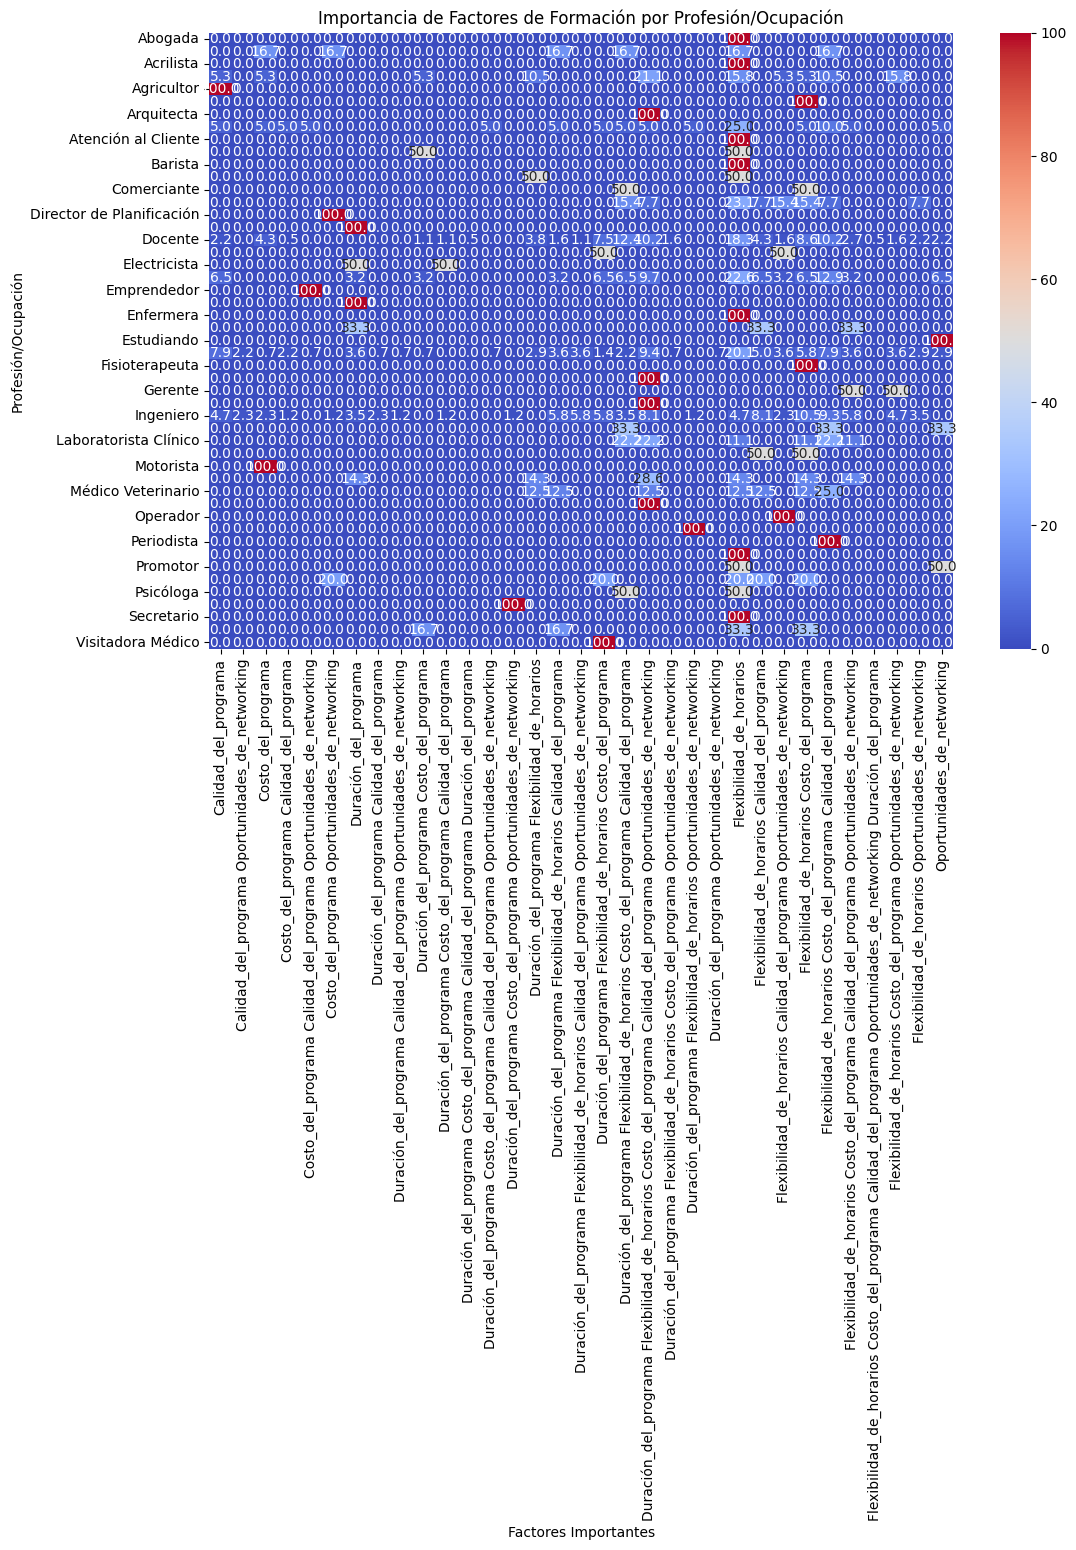

In [234]:
# Suponiendo que 'Profesión/Ocupación' y 'Factores_Importantes' son las columnas en tu DataFrame df
tabla_contingencia = pd.crosstab(df['Profesión/Ocupación'], df['Factores_Importantes'])
print(tabla_contingencia)

tabla_normalizada = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100
print(tabla_normalizada)


plt.figure(figsize=(12, 8))
sns.heatmap(tabla_normalizada, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Importancia de Factores de Formación por Profesión/Ocupación')
plt.ylabel('Profesión/Ocupación')
plt.xlabel('Factores Importantes')
plt.show()

# Nivel Académico vs. Modalidad de Estudio Preferida
	•	Objetivo: Explorar si el nivel académico influye en la modalidad de estudio preferida.

        
	•	Variables: Nivel Académico, Modalidad de Estudio Preferida

# Género vs. Modalidad de Estudio Preferida
	•	Objetivo: Determinar si hay una preferencia de modalidad de estudio basada en el género.
	•	Variables: Género, Modalidad de Estudio Preferida

# Lugar de residencia VS Profesión

In [269]:
# Concatenar todos los valores de la columna en un solo párrafo, excluyendo valores NaN
parrafo = ' '.join(df['Lugar_de_residencia'].dropna().astype(str).tolist())

San_Miguel: 232
La_Unión: 22
San_Salvador: 31
San_Francisco_Gotera: 28
Ciudad_Barrios: 5
Estanzuelas: 3
Santa_Elena: 5
Usulután: 36
El_Tránsito: 5
Quelepa: 2
Ozatlan: 1
Santa_Tecla: 6
La_Libertad: 2
Chirilagua: 4
Conchagua: 5
Chinameca: 16
San_Buenaventura: 2
Antiguo_Cuscatlán: 1
Usulutan: 6
Lolotique: 5
Apopa: 1
Berlín: 8
Pasaquina: 2
Comacarán: 2
Jucuarán: 1
Jucuapa: 6
Santa_Rosa_de_Lima: 8
Corinto: 2
El_Divisadero: 4
Moncagua: 9
Yayantique: 2
Nueva_Guadalupe: 6
Chapeltique: 2
San_Rafael_Oriente: 6
El_Carmen: 1
San_Jorge: 4
Cuscatlán: 1
Guatajiagua: 4
Mercedes_Umaña: 2
El_Triunfo: 2
Chalatenango: 4
Uluazapa: 2
Morazán: 1
Ciudad_Merliot: 1
Soyapango: 3
Lourdes_Colón: 1
Ciudad_Delgado: 1
Mejicanos: 3
Zacatecoluca: 2
La_Paz: 1
Santa_Ana: 6
San_Simón: 9
Cacaopera: 1
San_Vicente: 4
Ilopango: 1
Aguilares: 1
Chilanga: 4
San_Carlos: 5
San_Miguel.: 1
Sonsonate: 3
Jocoro: 4
San_Juan_Opico: 1
Nueva_Esparta: 2
Sesori: 2
Torola: 1
Yamabal: 2
Perquín: 3
Santiago_de_María: 4
Bolívar: 1
Alegría: 1
S

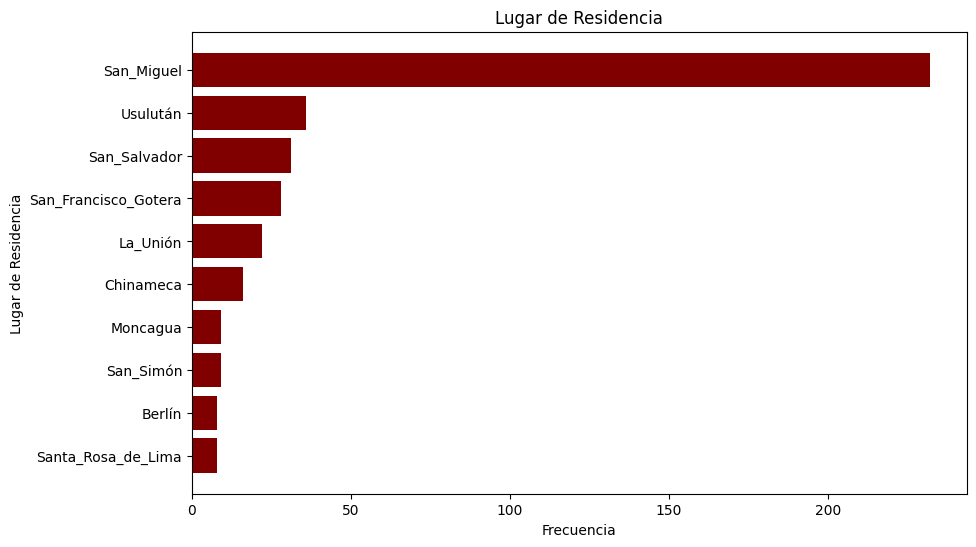

In [270]:
# Dividir el parrafo en palabras
palabras = parrafo.split()

# Crear un diccionario para almacenar las palabras y su frecuencia
frecuencia_palabras = {}

# Contar la frecuencia de cada palabra
for palabra in palabras:
    if palabra in frecuencia_palabras:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

# Imprimir la frecuencia de cada palabra
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")

# Ordenar el diccionario por frecuencia descendente
frecuencia_palabras = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

# Extraer las palabras y frecuencias para el gráfico
palabras_grafico = list(frecuencia_palabras.keys())
frecuencias_grafico = list(frecuencia_palabras.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(palabras_grafico[:10], frecuencias_grafico[:10], color='#800000')
plt.xlabel('Frecuencia')
plt.ylabel('Lugar de Residencia')
plt.title('Lugar de Residencia')

plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén arriba
plt.show()

In [ ]:
# Lugar de residencia Vs Grado académico